## Exercise 1
Given the following un-normalized posterior distribution:

            g(θ | x) ∝ 1/2 * exp( −((θ + 3)^2) / 2 ) + 1/2 * exp( −((θ - 3)^2) / 2 )

• draw a Markov Chain from the posterior distribution using a Metropolis-Hastings algorithm using a Norm (0, 1) as random-walk candidate density

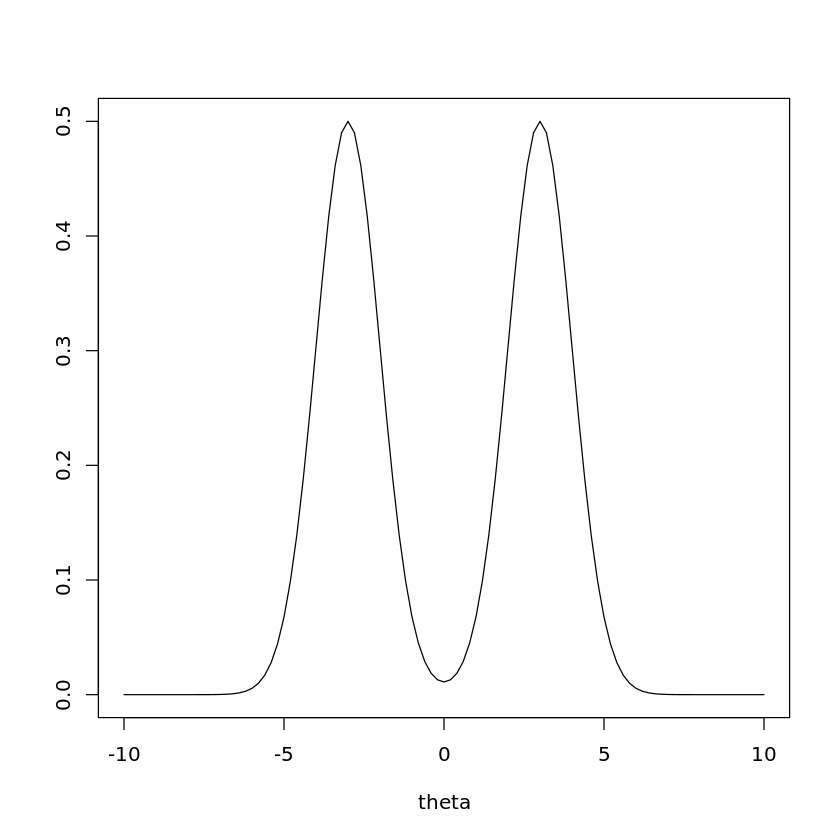

In [14]:
#target distribution
target = function(theta) {
    0.5*exp(-(theta+3)^2 / 2) + 0.5*exp(-(theta-3)^2 / 2)
}

curve(target, from=-10, to =10, xlab = "theta", ylab = " ")


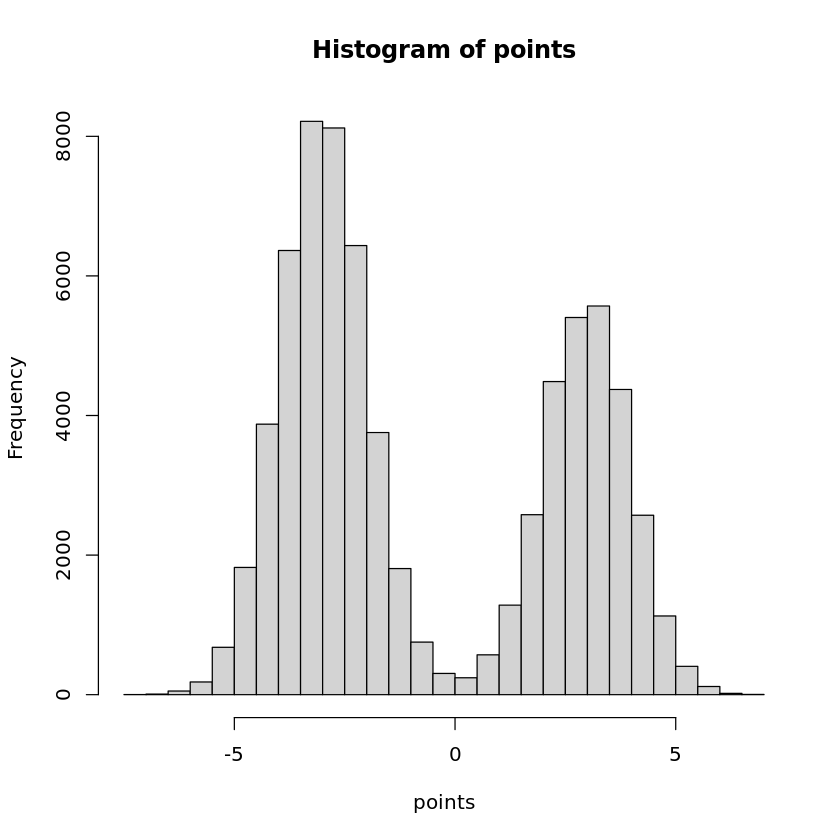

In [45]:
#MONTE-CARLO MARKOV CHAIN

N = 1E05 #number of drawiings


#inizialization of the chain at some value of the parameter theta
theta = 0
points = vector(mode="numeric") #vector that will contain the accepted points
for (i in 0:N) {
    
    #draw a sample from proposal distribution
    mu = theta
    sigma = 1
    s = rnorm(1, mean=mu, sd=sigma) #proposal distribution as N(0,1)
    
    #deciding if the sample is accepted
    metro_ratio = target(s) / target(theta)

    if (metro_ratio >= 1) { #accepted
        points = c(points, s)

        theta = s #update mean of the proposal to the accepted candidate
        
    }
    
    else if (0 <= metro_ratio & metro_ratio < 1) { 
        u = runif(1) 
        if (u < metro_ratio) { #accepted
            points = c(points, s)

            theta = s #update mean of the proposal to the accepted candidate
        } 
        else { #rejected
            theta = theta #it remains the same as before for the nex cycle
        } 
    }
}



In [43]:
hist(points, nclass=30)

 num [1:71099] -0.856 -1.511 0.301 -0.168 0.741 ...


[1] 1e+05

• plot the sampled distribution

In [44]:
?hist


hist {graphics},R Documentation
x,a vector of values for which the histogram is desired.
breaks,"one of: a vector giving the breakpoints between histogram cells, a function to compute the vector of breakpoints, a single number giving the number of cells for the histogram, a character string naming an algorithm to compute the number of cells (see ‘Details’), a function to compute the number of cells. In the last three cases the number is a suggestion only; as the breakpoints will be set to pretty values, the number is limited to 1e6 (with a warning if it was larger). If breaks is a function, the x vector is supplied to it as the only argument (and the number of breaks is only limited by the amount of available memory)."
freq,"logical; if TRUE, the histogram graphic is a representation of frequencies, the counts component of the result; if FALSE, probability densities, component density, are plotted (so that the histogram has a total area of one). Defaults to TRUE if and only if breaks are equidistant (and probability is not specified)."
probability,"an alias for !freq, for S compatibility."
include.lowest,"logical; if TRUE, an x[i] equal to the breaks value will be included in the first (or last, for right = FALSE) bar. This will be ignored (with a warning) unless breaks is a vector."
right,"logical; if TRUE, the histogram cells are right-closed (left open) intervals."
density,"the density of shading lines, in lines per inch. The default value of NULL means that no shading lines are drawn. Non-positive values of density also inhibit the drawing of shading lines."
angle,"the slope of shading lines, given as an angle in degrees (counter-clockwise)."
col,a colour to be used to fill the bars. The default of NULL yields unfilled bars.
border,the color of the border around the bars. The default is to use the standard foreground color.


• analyze the chain with the CODA package and plot the chain autocorrelation

• try to use different burn-in cycles and thinning and plot the corresponding posterior distribution
and the chain autocorrelation function. What are the best parameters ?